## Handwrtten Digits Identification with MNIST Database

Task: Train a module to identify the handwrtten digits

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Read MNIST Dataset Class from kaggle

### 1.Data Loading

In [82]:
#as_frame is True RETURN DataFrame, it is False RETURN Numpy Array 
imgdata = fetch_openml("mnist_784",as_frame=False)



In [83]:
imgdata

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

### Glance the data

In [84]:
print(imgdata.keys())
#print(imgdata.frame.info())

print(f"feature_names: {imgdata.feature_names}")
print(f"feature_names: {imgdata.target_names}")

print(f"Number of data: {len(imgdata.data)}")
print(f"Number of label: {len(imgdata.target)}")

print(f"Number of feature: {len(imgdata.feature_names)}")
print(f"Number of Target: {len(imgdata.target_names)}")


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
feature_names: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 

In [85]:

# Convert features into a Pandas DataFrame
df = pd.DataFrame(imgdata.data, columns=imgdata.feature_names)

# Compute statistics for each feature
feature_stats = df.agg(['mean', 'max', 'min', 'median']).T
#feature_stats = df.agg(['mean', 'max', 'min', 'median']).T.sort_values("median",ascending=False)

print(feature_stats)

# Save 5000 data to csv
#df[].to_csv('output.csv', index=False)  # index=False prevents writing row numbers
print("CSV saved as 'output.csv'")

              mean   max  min  median
pixel1    0.000000   0.0  0.0     0.0
pixel2    0.000000   0.0  0.0     0.0
pixel3    0.000000   0.0  0.0     0.0
pixel4    0.000000   0.0  0.0     0.0
pixel5    0.000000   0.0  0.0     0.0
...            ...   ...  ...     ...
pixel780  0.001714  62.0  0.0     0.0
pixel781  0.000000   0.0  0.0     0.0
pixel782  0.000000   0.0  0.0     0.0
pixel783  0.000000   0.0  0.0     0.0
pixel784  0.000000   0.0  0.0     0.0

[784 rows x 4 columns]
CSV saved as 'output.csv'


In [86]:
# Calculate percentiles for 'mean'
feature_stats['percentile'] = feature_stats['mean'].rank(pct=True) * 100

feature_stats

,mean,max,min,median,percentile
pixel1,0.000000,0.0,0.0,0.0,4.209184
pixel2,0.000000,0.0,0.0,0.0,4.209184
pixel3,0.000000,0.0,0.0,0.0,4.209184
pixel4,0.000000,0.0,0.0,0.0,4.209184
pixel5,0.000000,0.0,0.0,0.0,4.209184
...,...,...,...,...,...
pixel780,0.001714,62.0,0.0,0.0,11.989796
pixel781,0.000000,0.0,0.0,0.0,4.209184
pixel782,0.000000,0.0,0.0,0.0,4.209184
pixel783,0.000000,0.0,0.0,0.0,4.209184


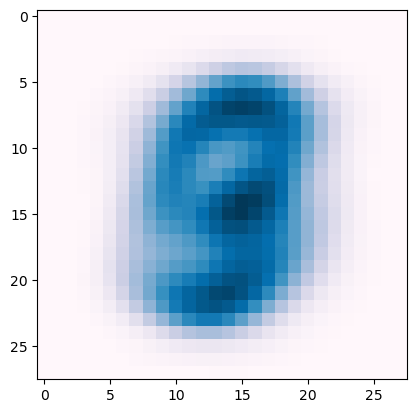

In [87]:
image = np.array(feature_stats['mean']).reshape(28,28)
image.shape
plt.imshow(image, cmap=plt.cm.PuBu)


In [88]:
feature_stats = feature_stats.round().sort_values("median",ascending=False)
print(feature_stats)

           mean    max  min  median  percentile
pixel408  140.0  255.0  0.0   173.0       100.0
pixel436  140.0  255.0  0.0   171.0       100.0
pixel435  136.0  255.0  0.0   168.0       100.0
pixel409  138.0  255.0  0.0   166.0       100.0
pixel212  136.0  255.0  0.0   156.0        99.0
...         ...    ...  ...     ...         ...
pixel273   77.0  255.0  0.0     0.0        78.0
pixel274   52.0  255.0  0.0     0.0        71.0
pixel275   31.0  255.0  0.0     0.0        64.0
pixel276   15.0  255.0  0.0     0.0        57.0
pixel784    0.0    0.0  0.0     0.0         4.0

[784 rows x 5 columns]


In [89]:
mean_list = feature_stats['mean'].tolist()


In [90]:
# Convert the 'mean' column to a list
mean_list = feature_stats['mean'].tolist()

# Drop the index of the DataFrame
feature_stats_no_index = feature_stats.reset_index(drop=True)

# Display results
print("Mean as list:", mean_list)
print("DataFrame with reset index:\n", feature_stats_no_index)

Mean as list: [140.0, 140.0, 136.0, 138.0, 136.0, 133.0, 132.0, 133.0, 133.0, 131.0, 131.0, 130.0, 128.0, 128.0, 127.0, 127.0, 127.0, 126.0, 126.0, 125.0, 125.0, 126.0, 126.0, 124.0, 124.0, 123.0, 123.0, 123.0, 123.0, 122.0, 123.0, 122.0, 122.0, 122.0, 122.0, 122.0, 119.0, 120.0, 119.0, 118.0, 118.0, 117.0, 117.0, 116.0, 116.0, 116.0, 116.0, 113.0, 114.0, 113.0, 112.0, 113.0, 113.0, 113.0, 112.0, 113.0, 113.0, 111.0, 111.0, 112.0, 112.0, 111.0, 111.0, 111.0, 109.0, 108.0, 108.0, 109.0, 112.0, 109.0, 108.0, 107.0, 107.0, 107.0, 106.0, 106.0, 107.0, 106.0, 105.0, 104.0, 107.0, 105.0, 105.0, 104.0, 103.0, 102.0, 101.0, 102.0, 101.0, 102.0, 99.0, 99.0, 98.0, 98.0, 101.0, 101.0, 100.0, 101.0, 99.0, 100.0, 97.0, 100.0, 100.0, 95.0, 94.0, 98.0, 96.0, 98.0, 97.0, 93.0, 95.0, 94.0, 95.0, 99.0, 93.0, 93.0, 95.0, 94.0, 96.0, 95.0, 94.0, 91.0, 93.0, 91.0, 90.0, 89.0, 91.0, 91.0, 87.0, 91.0, 90.0, 90.0, 85.0, 90.0, 83.0, 89.0, 86.0, 92.0, 89.0, 91.0, 89.0, 73.0, 78.0, 6.0, 78.0, 51.0, 33.0, 19.0, 9

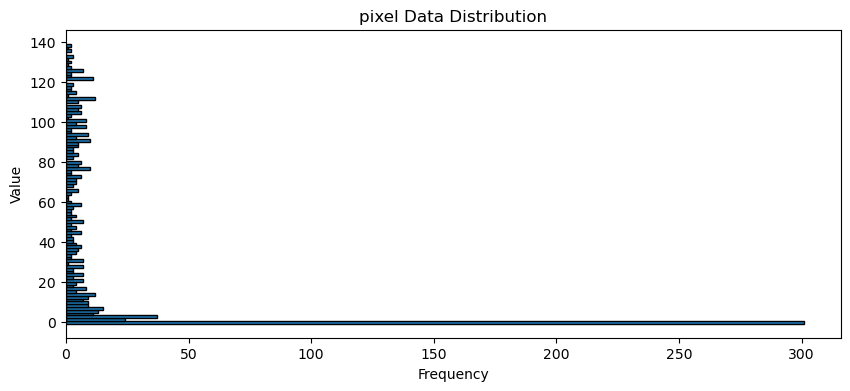

In [91]:
# Create a Figure
fig = plt.figure(figsize=(10,4))
mean_list = feature_stats['mean'].tolist()

# Plot a histogram
#plt.hist(y_train)
plt.hist(mean_list, bins=100, align='left', edgecolor='black', orientation='horizontal')



# Add titles and labels
plt.title('pixel Data Distribution')
plt.xlabel('Frequency')
plt.ylabel('Value')


# Ensure x-axis is in ascending order with integer ticks
# sorted_values = sorted(set(feature_stats['mean']))  # Get unique sorted values
plt.yticks()

# Add legend
#plt.legend()

# Show the figure
plt.show()

### 2.Data Normalization


In [92]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
X_normalized = scaler.fit_transform(imgdata.data)

## Features reduction with PCA

In [93]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% variance
pca = PCA(n_components=0.95)

# Fit PCA to the data and transform it
X_reduced = pca.fit_transform(X_normalized)

# Print the reduced shape
print("Original shape:", X_normalized.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (70000, 784)
Reduced shape: (70000, 154)


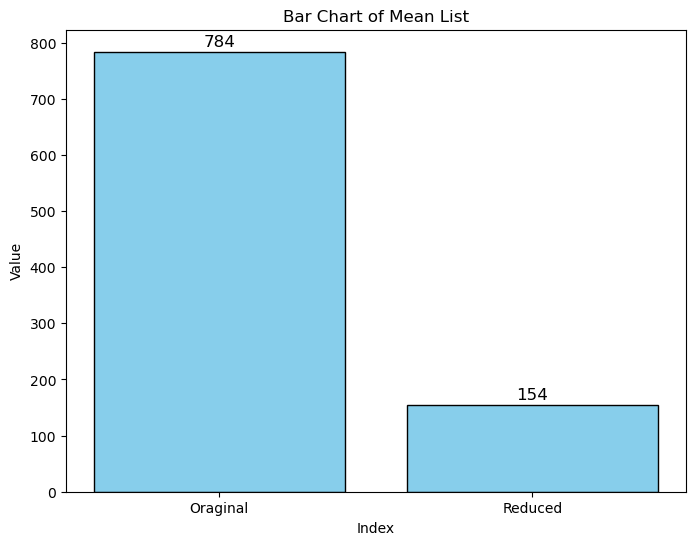

In [95]:

# Data
indices = ['Oraginal', "Reduced"]  # Indices for the bars
mean_list = [X_normalized.shape[1],X_reduced.shape[1]]

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Plot a bar chart
plt.bar(indices, mean_list, color='skyblue', edgecolor='black')

# Add the value numbers above the bars
for i, value in enumerate(mean_list):
    plt.text(indices[i], value + 10, str(value), ha='center', fontsize=12)

# Add titles and labels
plt.title('Bar Chart of Mean List')
plt.xlabel('Index')
plt.ylabel('Value')

# Add x-tick labels
plt.xticks(indices, labels=indices)

# Show the plot
plt.show()

In [67]:
mean_list

[784, 154]

#### Split training set and testing set

In [96]:
from sklearn.model_selection import train_test_split

X = X_reduced # use the X_reduced feature with PCA
y = imgdata.target

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.142, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 60060 rows
Test Set: 9940 rows


### 3. Data Visualization:

In [97]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


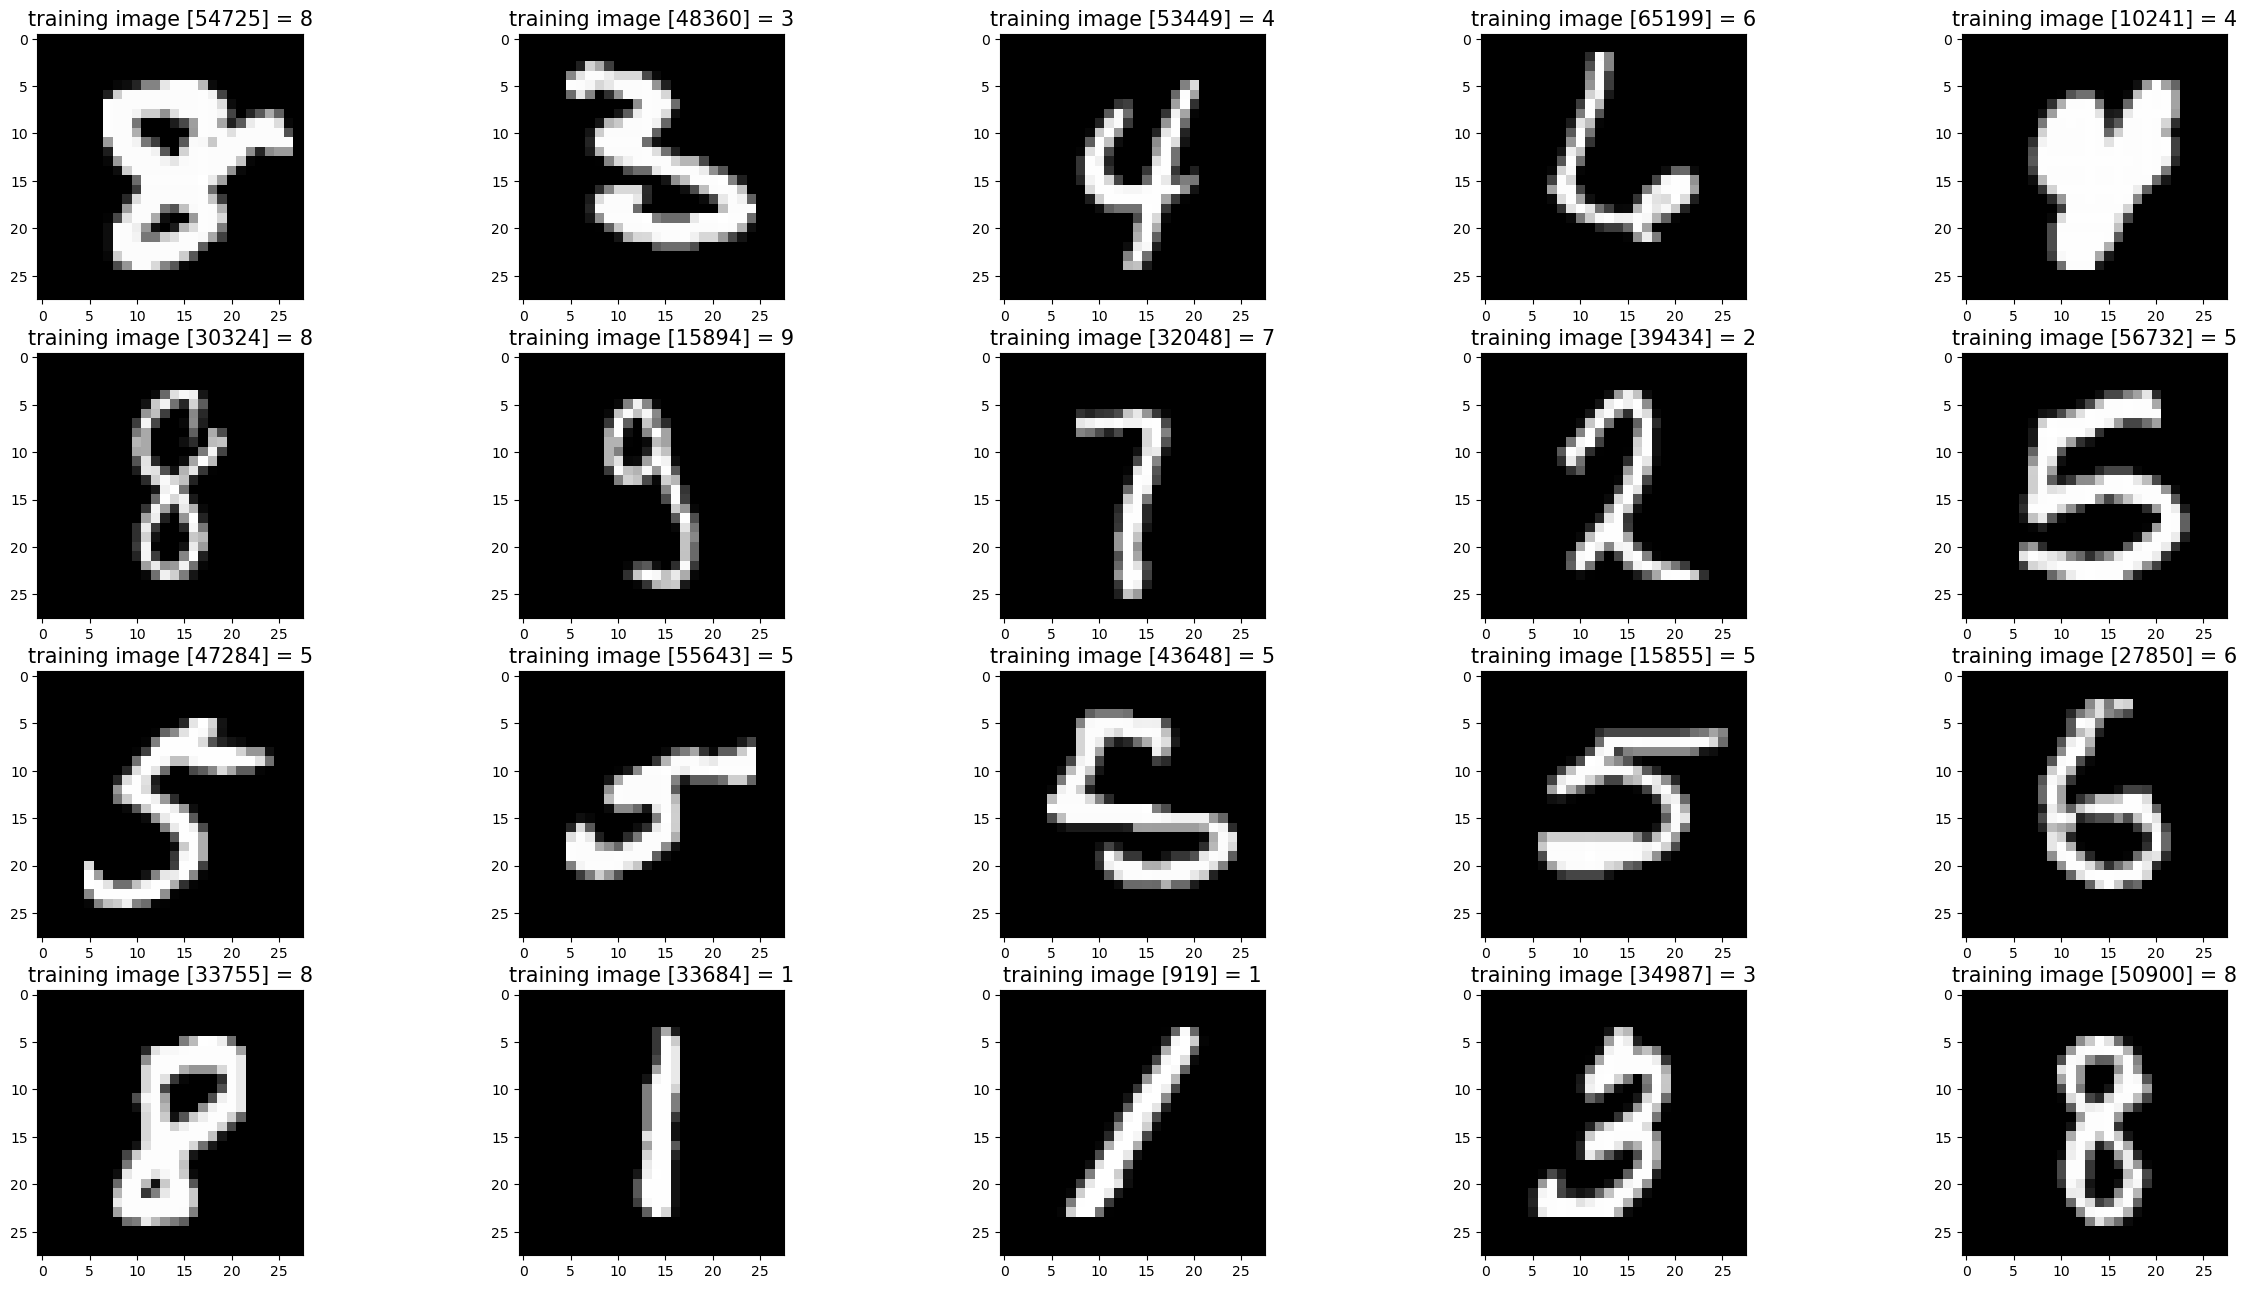

In [98]:
import random

#
# Show some random training and test images 
#
images_show = []
titles_show = []
for i in range(0, 20):
    r = random.randint(1, len(imgdata.data))
    images_show.append(imgdata.data[r].reshape(28,28))
    titles_show.append('training image [' + str(r) + '] = ' + str(imgdata.target[r]))    


show_images(images_show, titles_show)


## Data explortation

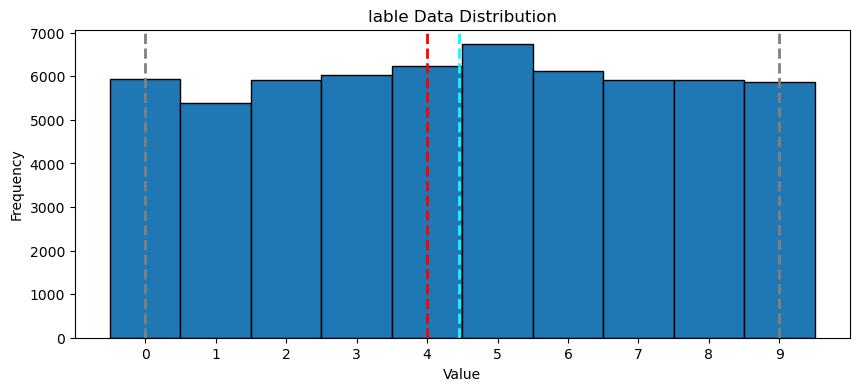

In [99]:
# Create a Figure
fig = plt.figure(figsize=(10,4))
y_train_numeric = y_train.astype(int)

# Plot a histogram
#plt.hist(y_train)
plt.hist(y_train, bins=range(min(y_train_numeric), max(y_train_numeric) + 2), align='left', edgecolor='black')


# Get statistics
min_val = min(y_train_numeric)
max_val = max(y_train_numeric)
mean_val = y_train_numeric.mean()
med_val = np.median(y_train_numeric)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)


# Add titles and labels
plt.title('lable Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


# Ensure x-axis is in ascending order with integer ticks
sorted_values = sorted(set(y_train_numeric))  # Get unique sorted values
plt.xticks(sorted_values, sorted_values)

# Add legend
#plt.legend()

# Show the figure
plt.show()

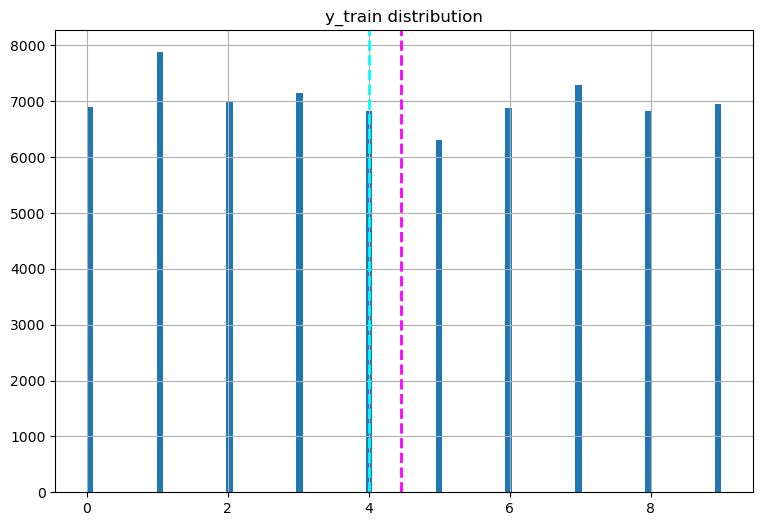

In [100]:
# numeric_features = y_train
# # Plot a histogram for each numeric feature
# for col in numeric_features:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = pd.Series(imgdata.target.astype(int))
feature.hist(bins=100, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("y_train distribution")
plt.show()

## Features reduction

## Training model

In [102]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))



Training Set: 60060 rows
Test Set: 9940 rows


In [ ]:
# one hot encoding fro local_convenience_stores
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV

# Save model lib
import joblib

# Train the model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# Eveluation
from sklearn.metrics import classification_report, accuracy_score

#
# --- Did normalization before ----
#

# # Define preprocessing for numeric columns (scale them)
# numeric_features = [1,2,4,5]
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# # Define preprocessing for categorical features (encode them)
# categorical_features = [0,3]
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline

# To see the preprocessor result
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# model = pipeline.fit_transform(X_train)
# print(model)

#pipeline = Pipeline(steps=[('preprocessor', preprocessor),
# --- End ----

pipeline = Pipeline(steps=[('regressor', SVC(C=1,probability=True))])

module_name = 'SVC c:1.0'

#
# Save model
#

model_file = 'P01 - '+module_name+' model_file.pkl'
#
# Becareful for overwriting the model file
#
# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
# # binary model file
joblib.dump(model, model_file) 

['P01 - SVC C10 model_file.pkl']

In [122]:
module_name = 'SVC c:1.0'

### Load model

In [ ]:
model_file = 'P01 - '+module_name+' model_file.pkl'


In [62]:
# Load the model from the file
model = joblib.load(model_file)

/opt/anaconda3/envs/py-tf-torch-env/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/envs/py-tf-torch-env/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Perdict

In [118]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Get predictions from test data
predictions = model.predict(X_test)

Overall Accuracy: 0.9804828973843058
Overall Precision: 0.9804612351461678
Overall Recall: 0.9804781260647013


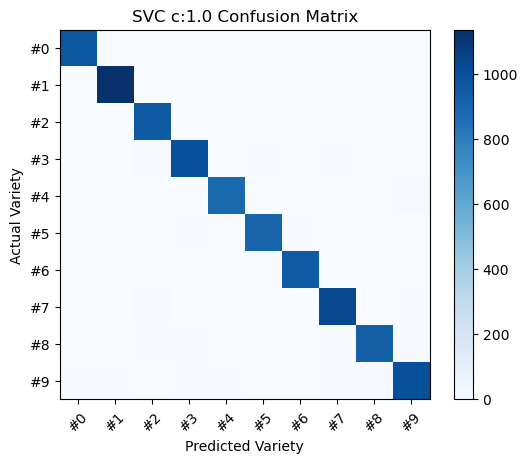

In [123]:
# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['#0','#1','#2','#3','#4','#5','#6','#7','#8','#9']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title(module_name+' Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

## ROC / AUC 

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)


Average AUC: 0.9996164012303422


['#0', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9']


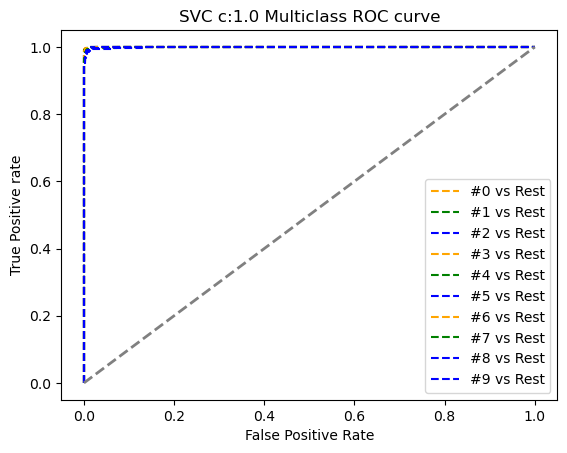

In [125]:
# Get ROC metrics for each class
print(classes)
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test.astype(int), probabilities[:,i], pos_label=i)


# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label=classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='green', label=classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label=classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='orange', label=classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='green', label=classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='blue', label=classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='blue', label=classes[9] + ' vs Rest')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title(module_name+' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Save model lib
import joblib

# Train the model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier


# Eveluation
from sklearn.metrics import classification_report, make_scorer, accuracy_score

# # ------- for single model mutiple parameter -----
# # Try these hyperparameter values
# params = {
# # 'regressor__learning_rate': [0.1, 0.5, 1.0],  # not for RandomForestRegressor 
#  'regressor__n_estimators' : [50, 150, 75, 175]   # regressor__ is for the training model name in pipline + "__" is MUST for the hyperparameter
#  }

# # Find the best hyperparameter combination to optimize the R2 metric
# score = make_scorer(r2_score)
# gridsearch = GridSearchCV(pipeline, params, scoring=score, cv=3, return_train_score=True)
# gridsearch.fit(X_train, y_train)
# # ------- for single model End -----


# ------- for mutiple model mutiple parameter -----
# Hyperparameters for different models
param_grid = [
    {
        'regressor': [SVC(probability=True)],  
        'regressor__C': [0.5, 1] 
    },
    # {
    #     'regressor': [KNeighborsClassifier()],
    #     'regressor__n_neighbors': [2, 3, 4, 5] 
    # }
]
score = make_scorer(accuracy_score)

# Find the best hyperparameter combination to optimize the R2 metric
gridsearch = GridSearchCV(pipeline, param_grid, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)

# ------- for mutiple model End -----

#print("Best model:", gridsearch.best_estimator_, "\n")
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
#print(model, "\n")

model_file = 'P01 - SCV Best model_file.pkl'
#
# Becareful for overwriting the model file
#

# # # binary model file
joblib.dump(model, model_file)

Best parameter combination: {'regressor': KNeighborsClassifier(), 'regressor__n_neighbors': 3} 



['P01 - Best model_file.pkl']

In [56]:
gridsearch.best_score_

0.9722610722610723

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Get predictions from test data
predictions = model.predict(X_test)

Overall Accuracy: 0.9732394366197183
Overall Precision: 0.9737369412969104
Overall Recall: 0.9728264641629674


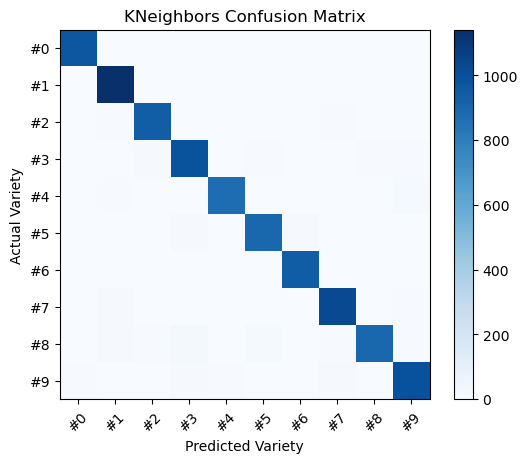

In [58]:
# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['#0','#1','#2','#3','#4','#5','#6','#7','#8','#9']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('KNeighbors Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

# AUC / ROC

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)
print('probabilities:', probabilities)

Average AUC: 0.9944532179634932
probabilities: [[0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.66666667 0.        ]
 ...
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]]


['#0', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9']


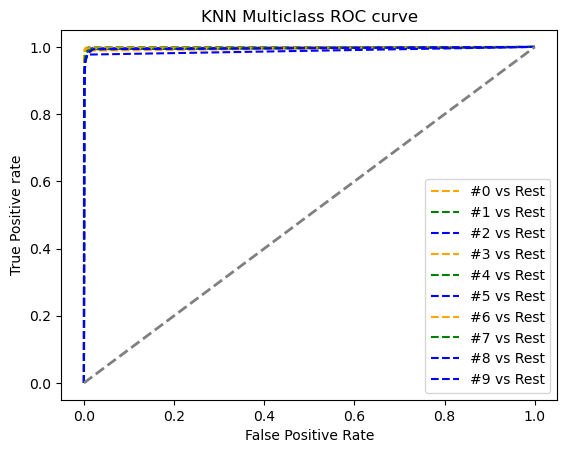

In [59]:
# Get ROC metrics for each class
print(classes)
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test.astype(int), probabilities[:,i], pos_label=i)


# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label=classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='green', label=classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label=classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='orange', label=classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='green', label=classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='blue', label=classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='blue', label=classes[9] + ' vs Rest')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title('KNN Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
